In [42]:
#Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [43]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#Column name of y dataset
feature_names = load_breast_cancer().feature_names
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

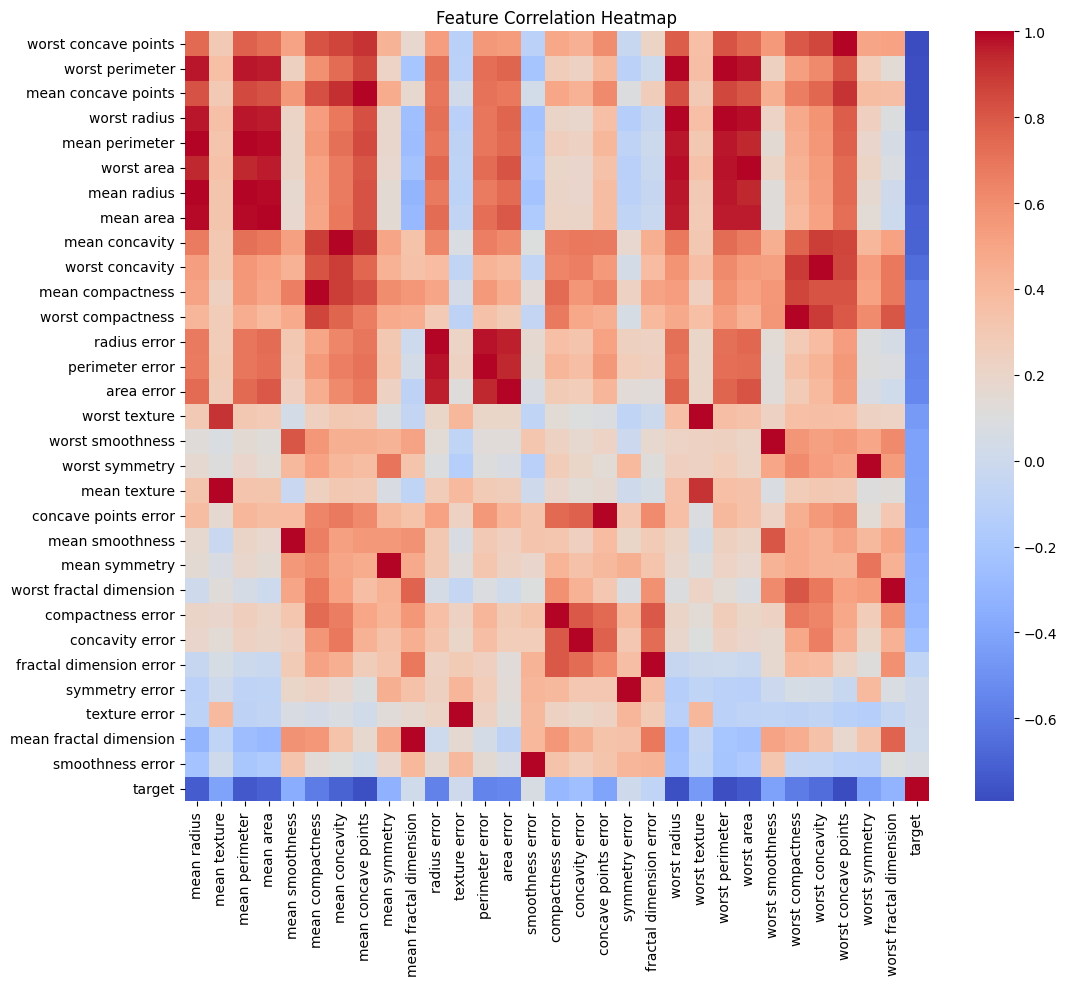

In [53]:
#Importing sns and showing correlation heatmap with column names to show how features are correlated with each other and with target variable arranged in ascending order
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = pd.DataFrame(X, columns=feature_names)
data['target'] = y
plt.figure(figsize=(12,10))
sns.heatmap(data.corr().sort_values(by='target', ascending=True), fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [4]:
import time
rf = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy * 100:.2f}%")
print(f"Training Time: {end_time - start_time:.2f} seconds")

Random Forest Classifier Accuracy: 96.49%
Training Time: 0.11 seconds


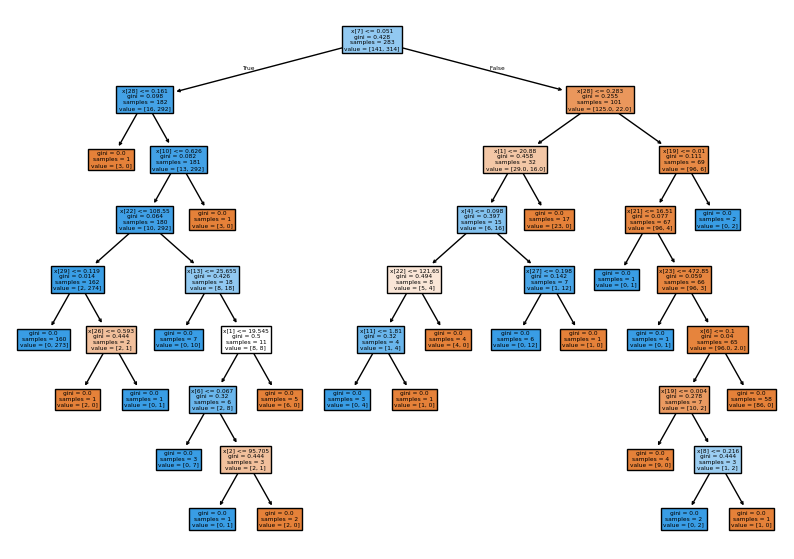

In [33]:
#Creating tree visualization for random forest 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plot_tree(rf.estimators_[10], filled=True)
plt.show()

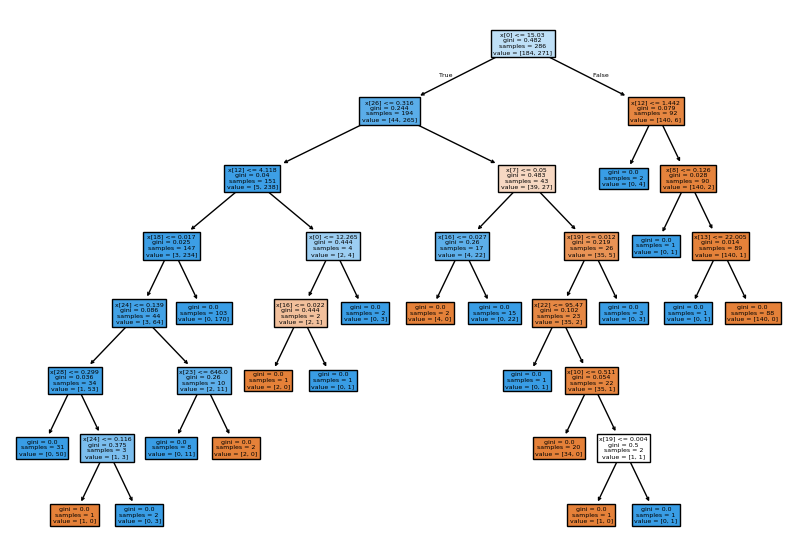

In [35]:
#Creating tree visualization for random forest 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plot_tree(rf.estimators_[7], filled=True)
plt.show()

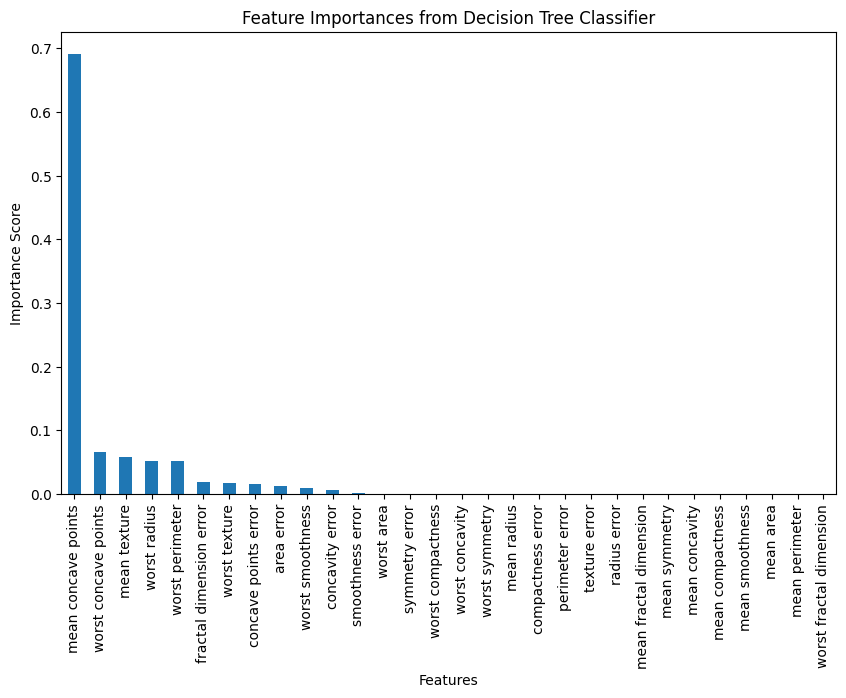

In [39]:
#Feature importance of decision tree
import pandas as pd
feature_importances = pd.Series(dt.feature_importances_, index=load_breast_cancer().feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
#Plotting bar graph
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances from Decision Tree Classifier")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

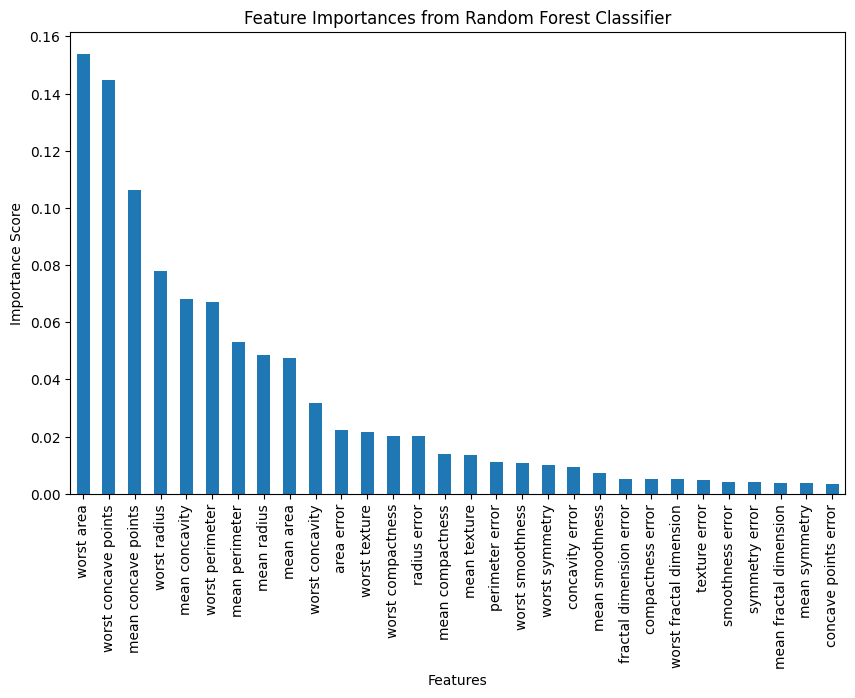

In [40]:
#Plotting bar graph for feature importance of random forest
import pandas as pd
feature_importances = pd.Series(rf.feature_importances_, index=load_breast_cancer().feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances from Random Forest Classifier")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

In [5]:
#Traininng just one decision tree for comparison

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
start = time.time()
dt.fit(X_train, y_train)
end = time.time()
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt * 100:.2f}%")
print(f"Training Time: {end - start:.2f} seconds")

Decision Tree Classifier Accuracy: 94.74%
Training Time: 0.01 seconds


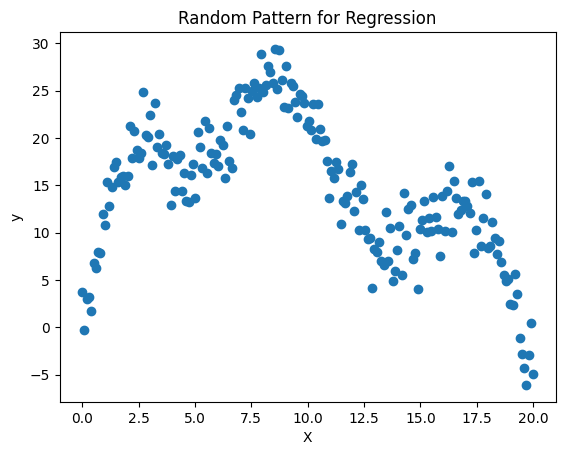

In [6]:
#Creating random pattern for regression 
import numpy as np
import matplotlib.pyplot as plt
# Generate x values
x = np.linspace(0, 20, 200)

# Mountain pattern: combination of sine waves + gaussian peaks + noise
y = (15 * np.sin(0.3*x) * np.exp(-0.05*x) + 
     20 * np.exp(-((x-7)**2)/8) + 
     25 * np.exp(-((x-14)**2)/10) +
     10 * np.sin(0.8*x) +
     np.random.normal(0, 2, len(x)))
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Random Pattern for Regression")
plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(x_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_l

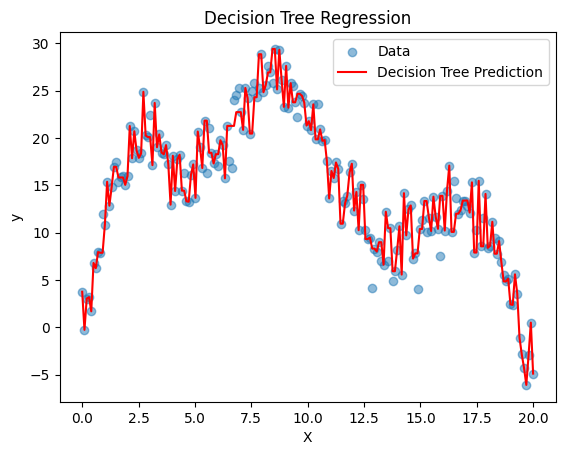

In [8]:
#Plotting regression curve for decision tree in line format
x = np.linspace(0, 20, 200)
y_pred_dt = dt_reg.predict(x.reshape(-1, 1))  
plt.scatter(x, y, label='Data', alpha=0.5)
plt.plot(x, y_pred_dt, color='red', label='Decision Tree Prediction')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title('Decision Tree Regression')
plt.show()

In [9]:
#Finding r2 score and mean squared error for decision tree regressor
from sklearn.metrics import r2_score, mean_squared_error
y_test_pred_dt = dt_reg.predict(x_test)
r2_dt = r2_score(y_test, y_test_pred_dt)
mse_dt = mean_squared_error(y_test, y_test_pred_dt)
print(f"Decision Tree Regressor R2 Score: {r2_dt:.4f}")
print(f"Decision Tree Regressor Mean Squared Error: {mse_dt:.4f}")

Decision Tree Regressor R2 Score: 0.8232
Decision Tree Regressor Mean Squared Error: 8.6471


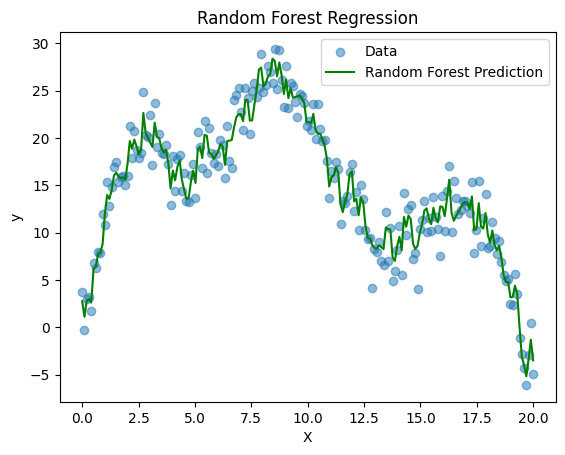

In [10]:
#Creating Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=10000)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x.reshape(-1, 1))  
plt.scatter(x, y, label='Data', alpha=0.5)
plt.plot(x, y_pred_rf, color='green', label='Random Forest Prediction')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title('Random Forest Regression')
plt.show()

In [11]:
#R2 score and mean squared error for random forest regressor
y_test_pred_rf = rf_reg.predict(x_test)
r2_rf = r2_score(y_test, y_test_pred_rf)
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
print(f"Random Forest Regressor R2 Score: {r2_rf:.4f}")
print(f"Random Forest Regressor Mean Squared Error: {mse_rf:.4f}")

Random Forest Regressor R2 Score: 0.8747
Random Forest Regressor Mean Squared Error: 6.1289


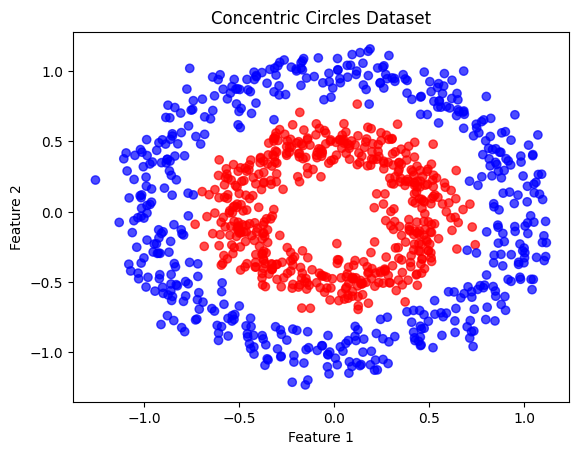

In [12]:
#Concentric circles dataset for classification
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Concentric Circles Dataset")
plt.show()

In [13]:
#Using decision tree and random forest classifier on concentric circles dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy on Concentric Circles: {accuracy_dt * 100:.2f}%")

Decision Tree Classifier Accuracy on Concentric Circles: 94.50%


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy on Concentric Circles: {accuracy_rf * 100:.2f}%")

Random Forest Classifier Accuracy on Concentric Circles: 95.00%


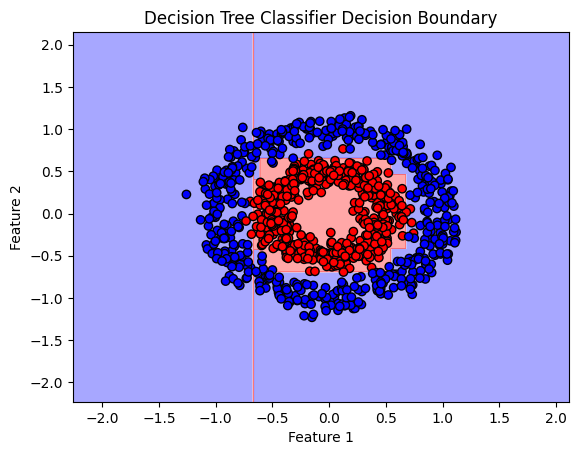

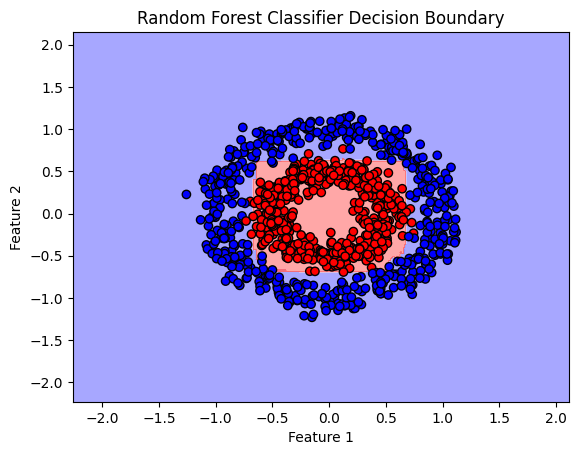

In [15]:
#Plotting decision boundary of decision tree
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='bwr')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
plot_decision_boundary(dt_clf, X, y, "Decision Tree Classifier Decision Boundary")
plot_decision_boundary(rf_clf, X, y, "Random Forest Classifier Decision Boundary")

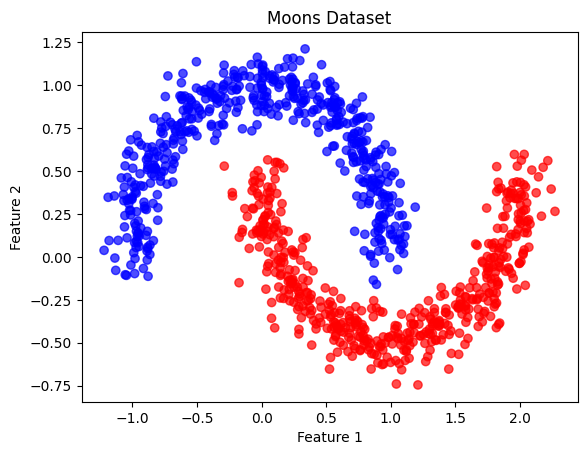

In [16]:
#Bulding moons
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='bwr', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moons Dataset")
plt.show()

In [23]:
#Using decision tree and random forest classifier on concentric circles dataset
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy on Moons Dataset: {accuracy_dt * 100:.2f}%")

Decision Tree Classifier Accuracy on Moons Dataset: 100.00%


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10000, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy on Moons Dataset: {accuracy_rf * 100:.2f}%")

Random Forest Classifier Accuracy on Moons Dataset: 100.00%


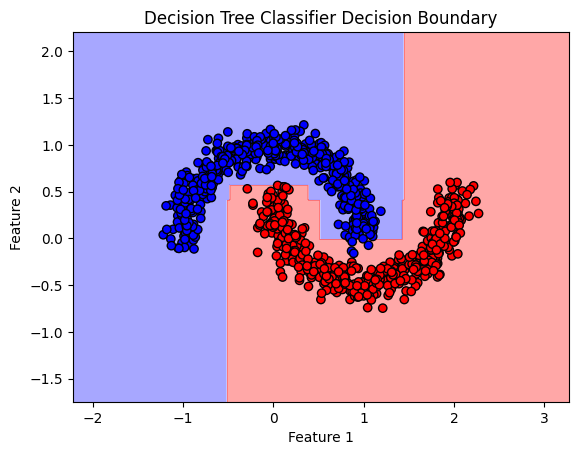

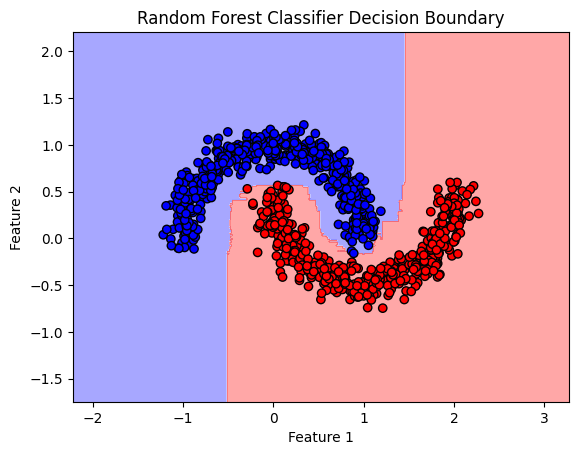

In [25]:
#Plotting decision boundary of decision tree
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='bwr')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
plot_decision_boundary(dt_clf, X_moons, y_moons, "Decision Tree Classifier Decision Boundary")
plot_decision_boundary(rf_clf, X_moons, y_moons, "Random Forest Classifier Decision Boundary")

In [28]:
#Accuracy on training data
y_train_pred_dt = dt_clf.predict(X_train)
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
print(f"Decision Tree Classifier Training Accuracy on Moons Dataset: {accuracy_train_dt * 100:.2f}%")
y_train_pred_rf = rf_clf.predict(X_train)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Random Forest Classifier Training Accuracy on Moons Dataset: {accuracy_train_rf * 100:.2f}%")

Decision Tree Classifier Training Accuracy on Moons Dataset: 99.62%
Random Forest Classifier Training Accuracy on Moons Dataset: 100.00%


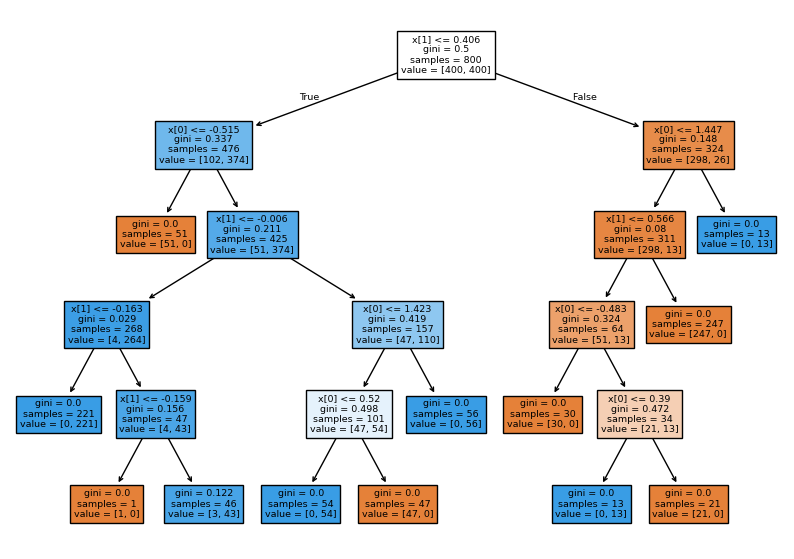

In [30]:
#Creating tree visualization for random forest 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plot_tree(dt_clf, filled=True)
plt.show()

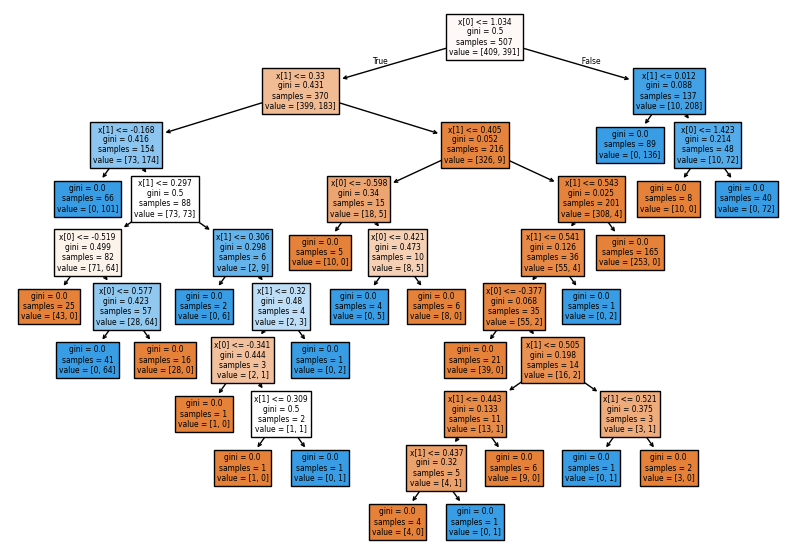

In [ ]:
#Creating tree visualization for random forest 
plt.figure(figsize=(10,7))
plot_tree(rf_clf.estimators_[10], filled=True)
plt.show()